<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0,0,0,0.1); text-align: center;">
    <h1 style="color: #4CAF50; font-size: 24px; font-weight: bold; margin-bottom: 20px;">🔥BioMedical Research Paper || Transformer || BERT🔥</h1>
</div>


![](https://pixelplex.io/wp-content/uploads/2024/01/llm-applications-main.jpg)

BERT (Bidirectional Encoder Representations from Transformers) is a powerful natural language processing (NLP) model introduced by researchers at Google AI in 2018. BERT has revolutionized various NLP tasks by providing pre-trained representations of language that capture rich contextual information.

One of the key aspects of BERT is its ability to learn bidirectional contextual representations of words in a sentence. Unlike traditional language models that predict the next word based on the previous words in a sentence (left-to-right or right-to-left), BERT uses a transformer architecture to consider both left and right context simultaneously. This enables BERT to capture deeper contextual understanding and better handle complex linguistic structures.

BERT is pre-trained on large corpora of text using two unsupervised learning tasks:
1. **Masked Language Model (MLM)**: BERT is trained to predict masked words within a sentence. During pre-training, a certain percentage of words in each input sentence are randomly masked, and BERT is trained to predict the masked words based on the surrounding context. This encourages the model to understand the relationship between words in a sentence.
2. **Next Sentence Prediction (NSP)**: BERT is also trained to determine whether two sentences are consecutive or not. For this task, BERT receives pairs of sentences as input during pre-training and learns to predict whether the second sentence is the actual next sentence that follows the first one in the corpus or not. This helps BERT understand the relationship between sentences and improves its ability to comprehend document-level context.

Once pre-trained, BERT can be fine-tuned on specific downstream tasks with relatively small amounts of task-specific data. Fine-tuning involves training BERT on a labeled dataset for tasks such as text classification, named entity recognition, question answering, and more. Fine-tuning BERT allows it to adapt its learned representations to the nuances of the target task, leading to impressive performance improvements across a wide range of NLP tasks.

Overall, BERT's ability to capture rich contextual information and its flexibility for fine-tuning have made it one of the most influential models in the field of natural language processing. Its pre-trained representations have been widely adopted and continue to drive advancements in various NLP applications.

<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0,0,0,0.1); text-align: center;">
    <h1 style="color: #4CAF50; font-size: 24px; font-weight: bold; margin-bottom: 20px;">🔍DataSet Path Fetching🔍</h1>
</div>


In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/train (4).csv
/kaggle/input/val (4).csv
/kaggle/input/test (4).csv


<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0,0,0,0.1); text-align: center;">
    <h1 style="color: #4CAF50; font-size: 24px; font-weight: bold; margin-bottom: 20px;">📂Importing and Installing Libraries📂</h1>
</div>


In [2]:
!pip install BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 45.7 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (3.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 12.1 MB/s eta 0:00:00
Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=819466 sha256=9593df1ab0fe2ede1cb246b420cc46df8b9558e39dbdfd510b2b3bd21f64ad0a
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
  

In [3]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.4 MB/s eta 0:00:00


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from umap import UMAP
import string
from sentence_transformers import SentenceTransformer
from nltk.corpus import stopwords
import plotly.express as px
from torch.utils.data import Dataset, DataLoader
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import torch.nn as nn
from transformers import BertForSequenceClassification, AdamW
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm
import contractions
from bertopic import BERTopic
from torch.nn.utils.rnn import pad_sequence
from transformers import BertTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

2024-04-29 11:50:05.682660: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 11:50:05.682757: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 11:50:05.783573: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0,0,0,0.1); text-align: center;">
    <h1 style="color: #4CAF50; font-size: 24px; font-weight: bold; margin-bottom: 20px;">⚡Loading the Data⚡</h1>
</div>


In [5]:
train_data = pd.read_csv("/kaggle/input/train (4).csv")
test_data = pd.read_csv("/kaggle/input/test (4).csv")
val_data = pd.read_csv("/kaggle/input/val (4).csv")

<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0,0,0,0.1); text-align: center;">
    <h1 style="color: #4CAF50; font-size: 24px; font-weight: bold; margin-bottom: 20px;">📜Sample of Train Test Val Data📜</h1>
</div>


In [6]:
train_data.sample(3)

,abstract_id,line_id,abstract_text,line_number,total_lines,current_line,target
73892,8746051,8746051_4_8,The rate of varice eradication associated with...,4,8,4_8,RESULTS
36312,10670114,10670114_2_14,Three groups of 20 patients each was pretreate...,2,14,2_14,METHODS
61780,15752122,15752122_4_10,The treatment modalities compared were : ( i )...,4,10,4_10,METHODS


In [7]:
val_data.sample(3)

,abstract_id,line_id,abstract_text,line_number,total_lines,current_line,target
19345,24833327,24833327_2_10,Patients with spirometry-confirmed stable COPD...,2,10,2_10,METHODS
6424,24139639,24139639_5_12,We used regression analyses to compare the fre...,5,12,5_12,METHODS
8508,25863847,25863847_0_12,To compare macular hole ( MH ) closure and vis...,0,12,0_12,OBJECTIVE


In [8]:
test_data.sample(3)

,abstract_id,line_id,abstract_text,line_number,total_lines,current_line,target
21290,20108776,20108776_10_11,It is one of the mechanisms that Kurarinol can...,10,11,10_11,CONCLUSIONS
20824,18285431,18285431_9_13,There were no significant differences between ...,9,13,9_13,RESULTS
2470,9160033,9160033_7_8,Lodoxamide is effective in reducing tryptase l...,7,8,7_8,CONCLUSIONS


<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0,0,0,0.1); text-align: center;">
    <h1 style="color: #4CAF50; font-size: 24px; font-weight: bold; margin-bottom: 20px;">📈Data Visualization📉</h1>
</div>


![Image](https://e7.pngegg.com/pngimages/32/706/png-clipart-data-analytics-guide-for-beginners-introduction-data-analysis-data-science-computer-program-computer-programming.png)

In [9]:
px.histogram(train_data.abstract_text.apply(len))

In [10]:
px.histogram(test_data.abstract_text.apply(len))

In [11]:
px.histogram(val_data.abstract_text.apply(len))

In [12]:
vectorizer_model = CountVectorizer(stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model)

<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0,0,0,0.1); text-align: center;">
    <h1 style="color: #4CAF50; font-size: 24px; font-weight: bold; margin-bottom: 20px;">🛠Data Preprocessing🛠</h1>
</div>


![](https://miro.medium.com/v2/resize:fit:877/1*pt47uCcCn3X7XNYQg1dghw.png)

* **Lowercasing**

In [13]:
train_data['abstract_text'] = train_data['abstract_text'].str.lower()
test_data['abstract_text'] = test_data['abstract_text'].str.lower()
val_data['abstract_text'] = val_data['abstract_text'].str.lower()

* **Remove HTML**

In [14]:
import re
def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

train_data['abstract_text'] = train_data['abstract_text'].apply(remove_html)
test_data['abstract_text'] = test_data['abstract_text'].apply(remove_html)
val_data['abstract_text'] = val_data['abstract_text'].apply(remove_html)

* **Remove URL**

In [15]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

train_data['abstract_text'] = train_data['abstract_text'].apply(remove_url)
test_data['abstract_text'] = test_data['abstract_text'].apply(remove_url)
val_data['abstract_text'] = val_data['abstract_text'].apply(remove_url)

* **Removing Alphanumeric**

In [16]:
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())
    return text

train_data['abstract_text'] = train_data['abstract_text'].apply(preprocess_text)
test_data['abstract_text'] = test_data['abstract_text'].apply(preprocess_text)
val_data['abstract_text'] = val_data['abstract_text'].apply(preprocess_text)

* **Remove Punctuations**

In [17]:
def remove_punctuation(text):
    exclude = set(string.punctuation)
    return ''.join(char for char in text if char not in exclude)

train_data['abstract_text'] = train_data['abstract_text'].apply(remove_punctuation)
test_data['abstract_text'] = test_data['abstract_text'].apply(remove_punctuation)
val_data['abstract_text'] = val_data['abstract_text'].apply(remove_punctuation)

In [18]:
train_data.sample(3)

,abstract_id,line_id,abstract_text,line_number,total_lines,current_line,target
79767,17088500,17088500_13_18,comparisons between patients with mdd and cont...,13,18,13_18,RESULTS
69788,20045576,20045576_7_10,mean reductions in pain intensity at 80 minute...,7,10,7_10,RESULTS
39739,23166343,23166343_4_14,the danafarber cancer institute all consortium...,4,14,4_14,METHODS


* **Word Cloud**

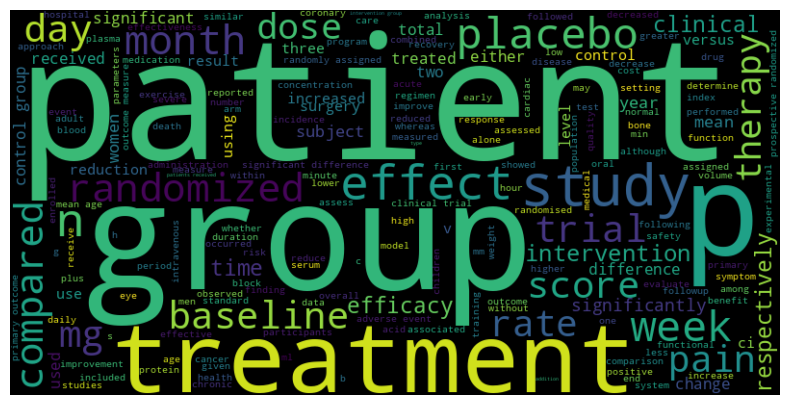

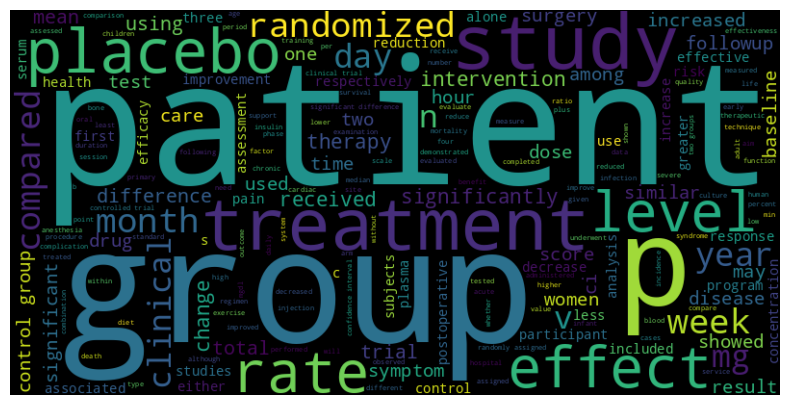

In [19]:
import random
from matplotlib import pyplot as plt
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

sample_size = 1000 
articles_list = train_data['abstract_text'].tolist()

sample_articles = random.sample(articles_list, sample_size)

article_text = ' '.join(sample_articles)
generate_wordcloud(article_text)

articles_list = test_data['abstract_text'].tolist()

sample_articles = random.sample(articles_list, sample_size)

article_text = ' '.join(sample_articles)
generate_wordcloud(article_text)

* **Remove contractions**

In [20]:
def expand_contractions(text):
    expanded_text = contractions.fix(text)
    return expanded_text

train_data['abstract_text'] = train_data['abstract_text'].apply(expand_contractions)
test_data['abstract_text'] = test_data['abstract_text'].apply(expand_contractions)
val_data['abstract_text'] = val_data['abstract_text'].apply(expand_contractions)

* **Removing StopWords**

In [21]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    
    words = word_tokenize(text)
    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

train_data['abstract_text'] = train_data['abstract_text'].apply(remove_stopwords)
test_data['abstract_text'] = test_data['abstract_text'].apply(remove_stopwords)
val_data['abstract_text'] = val_data['abstract_text'].apply(remove_stopwords)

In [22]:
train_data.sample(3)

,abstract_id,line_id,abstract_text,line_number,total_lines,current_line,target
44154,14641395,14641395_5_14,intervention applied intervention group 12 wee...,5,14,5_14,METHODS
67960,25266357,25266357_4_11,overall sui mui subgroups significantly patien...,4,11,4_11,RESULTS
1395,25244977,25244977_0_13,determine new singlesample device eswab copan ...,0,13,0_13,OBJECTIVE


* **Tokenization**

In [23]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [24]:
def tokenize_text(text, max_length=128):
    tokenized = tokenizer(text, padding='max_length', truncation=True, max_length=max_length, return_tensors="pt")
    return tokenized['input_ids'], tokenized['attention_mask']

#train_data[['input_ids', 'attention_mask']] = train_data['abstract_text'].apply(tokenize_text).apply(pd.Series)
#test_data[['input_ids', 'attention_mask']] = test_data['abstract_text'].apply(tokenize_text).apply(pd.Series)
#val_data[['input_ids', 'attention_mask']] = val_data['abstract_text'].apply(tokenize_text).apply(pd.Series)

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['target'] = label_encoder.fit_transform(train_data['target'])
val_data['target'] = label_encoder.transform(val_data['target'])
test_data['target'] = label_encoder.transform(test_data['target'])

<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0,0,0,0.1); text-align: center;">
    <h1 style="color: #4CAF50; font-size: 24px; font-weight: bold; margin-bottom: 20px;">🔥Model Training - Transformer (BERT)🔥</h1>
</div>


![](https://miro.medium.com/v2/resize:fit:1400/1*5yxKYbi_K2NihsW6Z0Tq-Q.png)

In [26]:
num_classes = train_data['target'].nunique()
print("Number of classes is:", num_classes)

Number of classes is: 5


In [27]:
class BiomedicalTransformer(torch.nn.Module):
    def __init__(self, num_classes):
        super(BiomedicalTransformer, self).__init__()
        self.bert = torch.hub.load('huggingface/pytorch-transformers', 'model', 'bert-base-uncased', output_attentions=True)
        self.dropout = torch.nn.Dropout(0.1)
        self.fc = torch.nn.Linear(768, num_classes)
        
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs[1]  
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

In [28]:
def my_collate_fn(batch):
    input_ids_batch = [item[0] for item in batch]
    attention_mask_batch = [item[1] for item in batch]
    labels_batch = [item[2] for item in batch]
    
    input_ids_batch_padded = torch.nn.utils.rnn.pad_sequence(input_ids_batch, batch_first=True, padding_value=tokenizer.pad_token_id)
    attention_mask_batch_padded = torch.nn.utils.rnn.pad_sequence(attention_mask_batch, batch_first=True, padding_value=0)
    labels_batch_padded = torch.stack(labels_batch)
    
    return input_ids_batch_padded, attention_mask_batch_padded, labels_batch_padded

In [29]:
class CustomDataset(Dataset):
    def __init__(self, data, max_length=128):
        self.data = data
        self.max_length = max_length
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        text = self.data.iloc[idx]['abstract_text']
        label = self.data.iloc[idx]['target']
        input_ids, attention_mask = tokenize_text(text, max_length=self.max_length)
        return input_ids.squeeze(0), attention_mask.squeeze(0), torch.tensor(label)

In [30]:
train_dataset = CustomDataset(train_data)
val_dataset = CustomDataset(val_data)
test_dataset = CustomDataset(test_data)

In [31]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=my_collate_fn)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, collate_fn=my_collate_fn)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=my_collate_fn)

In [32]:
#train_dataset = CustomDataset(train_data['input_ids'], train_data['attention_mask'], train_data['target'])
#val_dataset = CustomDataset(val_data['input_ids'], val_data['attention_mask'], val_data['target'])
#test_dataset = CustomDataset(test_data['input_ids'], test_data['attention_mask'], test_data['target'])
#train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
#val_loader = DataLoader(val_dataset, batch_size=8)

In [33]:
!pip install sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 11.2 MB/s eta 0:00:00


In [34]:
num_classes = train_data['target'].nunique()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BiomedicalTransformer(num_classes).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

Downloading: "https://github.com/huggingface/pytorch-transformers/zipball/main" to /root/.cache/torch/hub/main.zip


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, val_loader, criterion, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
        for input_ids, attention_mask, labels in val_loader:
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            
            # Statistics
            val_loss += loss.item() * labels.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # Store labels and predictions for evaluation metrics
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
    
    # Calculate loss and accuracy
    val_loss = val_loss / total
    val_acc = correct / total
    
    # Calculate additional evaluation metrics
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    cm = confusion_matrix(all_labels, all_predictions)
    
    return val_loss, val_acc, precision, recall, f1, cm

In [36]:
from tqdm import tqdm
import time

def train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs=10):
    model.train()
    
    # Lists to store training and validation metrics
    train_losses = []
    train_accuracies = []
    val_losses = []
    val_accuracies = []
    val_precisions = [] 
    val_recalls = []  
    val_f1s = [] 
    val_cms = [] 
    elapsed_times = []
    
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        correct = 0
        total = 0
        
        start_time = time.time()  # Record start time
        
        # Training loop with tqdm for progress bar
        with tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch') as tepoch:
            for input_ids, attention_mask, labels in tepoch:
                input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
                
                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                outputs = model(input_ids, attention_mask)
                loss = criterion(outputs, labels)
                
                # Backward pass and optimization
                loss.backward()
                optimizer.step()
                
                # Statistics
                epoch_loss += loss.item() * labels.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                # Calculate current training accuracy
                curr_acc = correct / total
                
                # Update tqdm description with loss and accuracy
                tepoch.set_postfix(loss=loss.item(), acc=curr_acc)
        
        end_time = time.time()  # Record end time
        elapsed_time = end_time - start_time  # Calculate elapsed time
        elapsed_times.append(elapsed_time)
        
        # Calculate train loss and accuracy
        train_loss = epoch_loss / total
        train_acc = correct / total
        
        # Store training metrics
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        
        # Validation
        val_loss, val_acc, val_precision, val_recall, val_f1, val_cm = evaluate_model(model, val_loader, criterion, device)
        
        # Store validation metrics
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        val_precisions.append(val_precision)
        val_recalls.append(val_recall)
        val_f1s.append(val_f1)
        val_cms.append(val_cm)
        
        # Print progress with elapsed time
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Elapsed Time: {elapsed_time:.2f} sec')
    
    # Return all metrics
    return train_losses, train_accuracies, val_losses, val_accuracies, val_precisions, val_recalls, val_f1s, val_cms, elapsed_times

In [37]:
train_losses, train_accuracies, val_losses, val_accuracies, val_precisions, val_recalls, val_f1s, val_cms, elapsed_times = train_model(model, train_loader, val_loader, optimizer, criterion, device, num_epochs=3)

Epoch 1/3: 100%|██████████| 5000/5000 [29:07<00:00,  2.86batch/s, acc=0.795, loss=0.537]


Epoch 1/3, Train Loss: 0.5522, Train Acc: 0.7954, Val Loss: 0.4916, Val Acc: 0.8223, Elapsed Time: 1747.95 sec


Epoch 2/3: 100%|██████████| 5000/5000 [28:48<00:00,  2.89batch/s, acc=0.859, loss=0.128]


Epoch 2/3, Train Loss: 0.3900, Train Acc: 0.8587, Val Loss: 0.4631, Val Acc: 0.8296, Elapsed Time: 1728.80 sec


Epoch 3/3: 100%|██████████| 5000/5000 [28:49<00:00,  2.89batch/s, acc=0.908, loss=0.205]


Epoch 3/3, Train Loss: 0.2530, Train Acc: 0.9075, Val Loss: 0.5033, Val Acc: 0.8255, Elapsed Time: 1729.78 sec


In [38]:
save_path = "/kaggle/working/model.pt"
torch.save(model.state_dict(), save_path)
print(f"Model saved to {save_path}")

Model saved to /kaggle/working/model.pt


<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0,0,0,0.1); text-align: center;">
    <h1 style="color: #4CAF50; font-size: 24px; font-weight: bold; margin-bottom: 20px;">📈Model Training Graph📉🔍</h1>
</div>


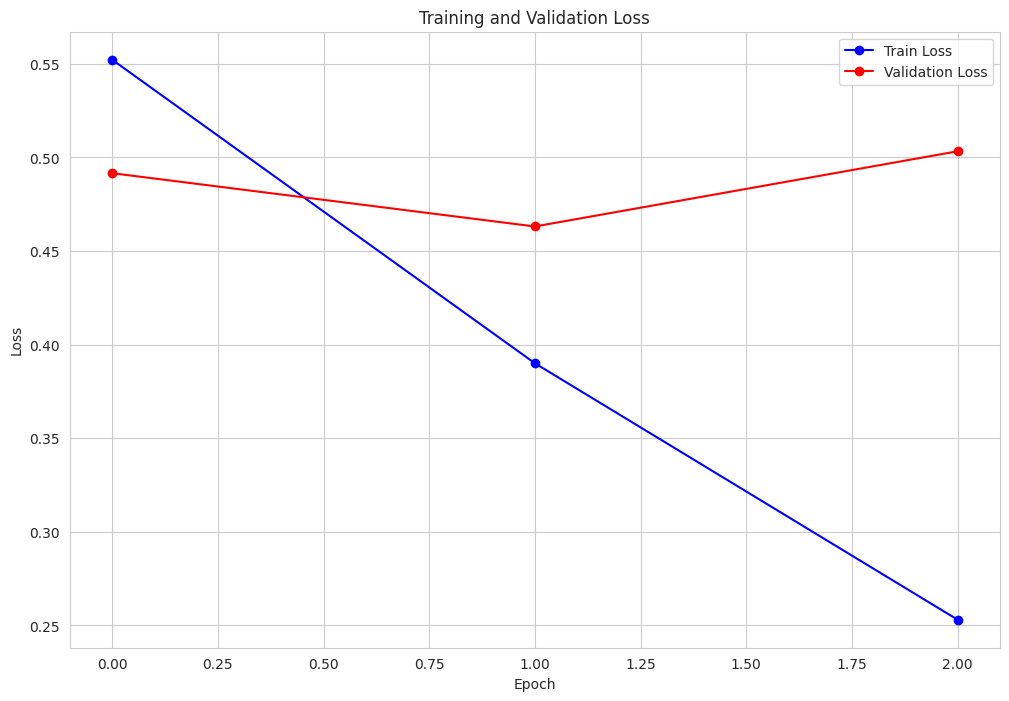

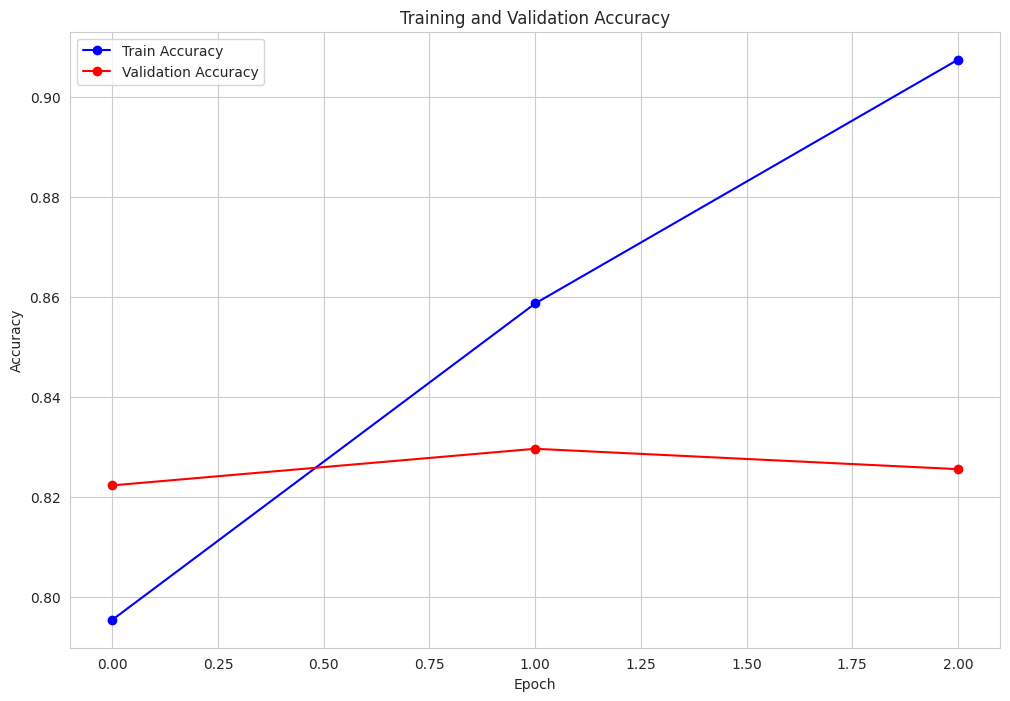

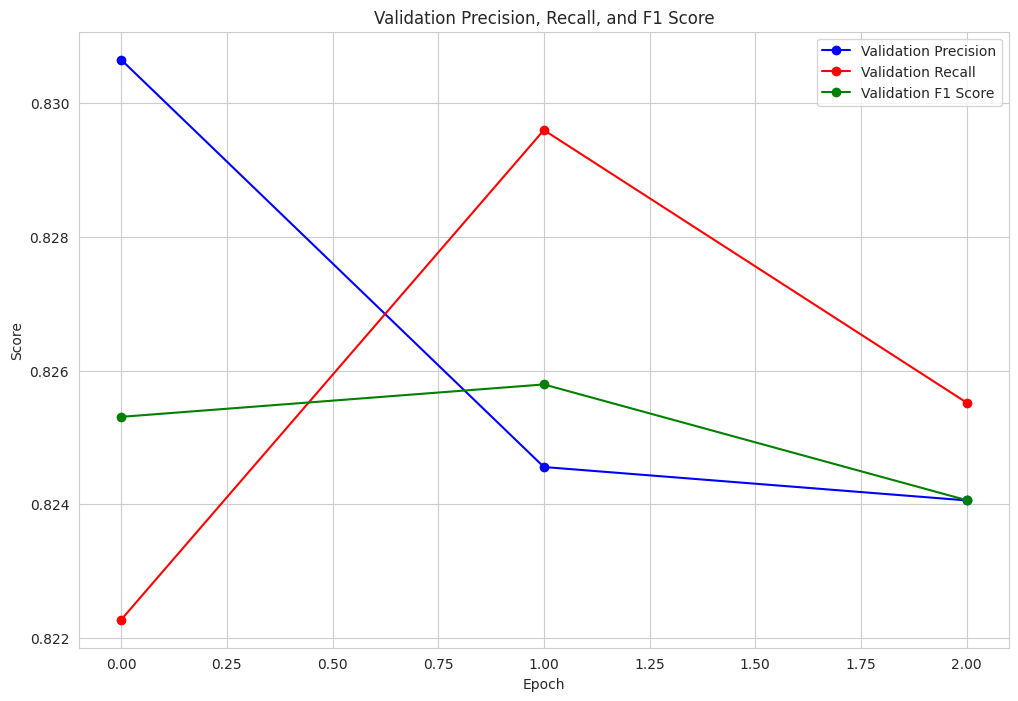

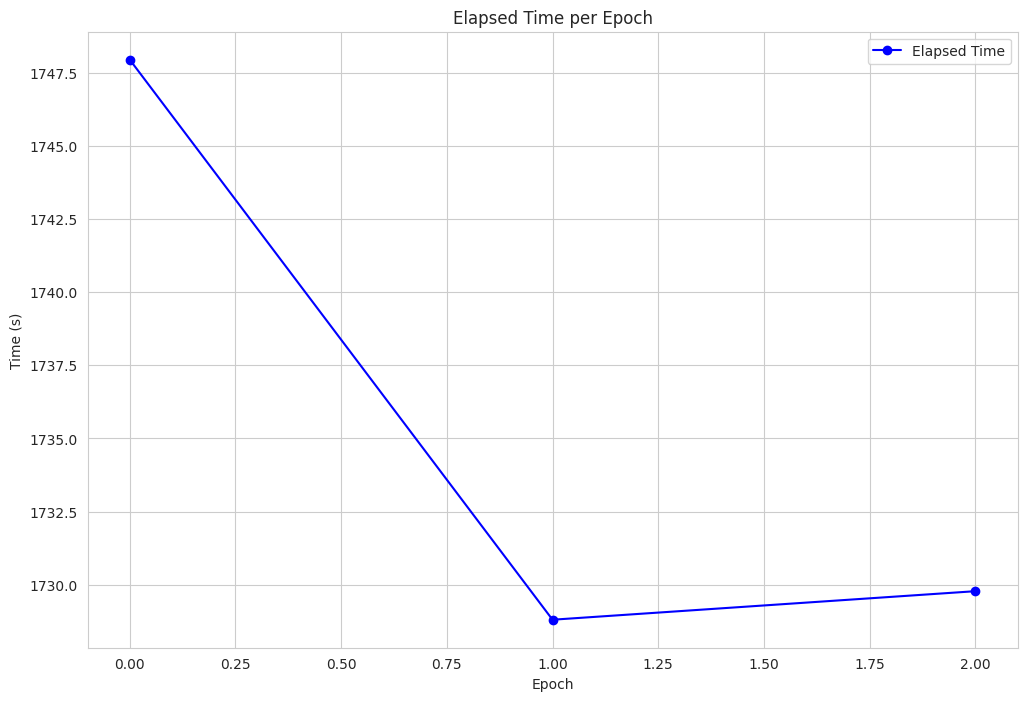

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_curves(train_losses, train_accuracies, val_losses, val_accuracies, val_precisions, val_recalls, val_f1s, elapsed_times):
    # Set style
    sns.set_style("whitegrid")
    
    # Plot training and validation losses
    plt.figure(figsize=(12, 8))
    plt.plot(train_losses, label='Train Loss', color='blue', marker='o')
    plt.plot(val_losses, label='Validation Loss', color='red', marker='o')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plot training and validation accuracies
    plt.figure(figsize=(12, 8))
    plt.plot(train_accuracies, label='Train Accuracy', color='blue', marker='o')
    plt.plot(val_accuracies, label='Validation Accuracy', color='red', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot validation precision, recall, and F1 score
    plt.figure(figsize=(12, 8))
    plt.plot(val_precisions, label='Validation Precision', color='blue', marker='o')
    plt.plot(val_recalls, label='Validation Recall', color='red', marker='o')
    plt.plot(val_f1s, label='Validation F1 Score', color='green', marker='o')
    plt.title('Validation Precision, Recall, and F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

    # Plot elapsed time per epoch
    plt.figure(figsize=(12, 8))
    plt.plot(elapsed_times, label='Elapsed Time', color='blue', marker='o')
    plt.title('Elapsed Time per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.show()


plot_curves(train_losses, train_accuracies, val_losses, val_accuracies, val_precisions, val_recalls, val_f1s, elapsed_times)


<div style="background-color: #f0f0f0; padding: 20px; border-radius: 10px; box-shadow: 0 4px 6px rgba(0,0,0,0.1); text-align: center;">
    <h1 style="color: #4CAF50; font-size: 24px; font-weight: bold; margin-bottom: 20px;">🔍Model Evaluation & Prediction🔍</h1>
</div>


![](https://aisera.com/wp-content/uploads/2023/12/LLM-Evaluation.png)

In [40]:
def evaluate_model(model, data_loader, device):
    model.eval()
    all_predictions = []
    all_labels = []
    
    with torch.no_grad():
        for input_ids, attention_mask, labels in data_loader:
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(input_ids, attention_mask)
            
            # Get predictions
            _, predicted = torch.max(outputs, 1)
            
            # Store predictions and labels
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    confusion_mat = confusion_matrix(all_labels, all_predictions)
    
    return all_predictions, accuracy, precision, recall, f1, confusion_mat

In [41]:
# Get predictions and evaluation metrics on unseen data (test_loader)
test_predictions, test_accuracy, test_precision, test_recall, test_f1, test_confusion_mat = evaluate_model(model, test_loader, device)

In [42]:
label_encoder.classes_

array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
      dtype=object)

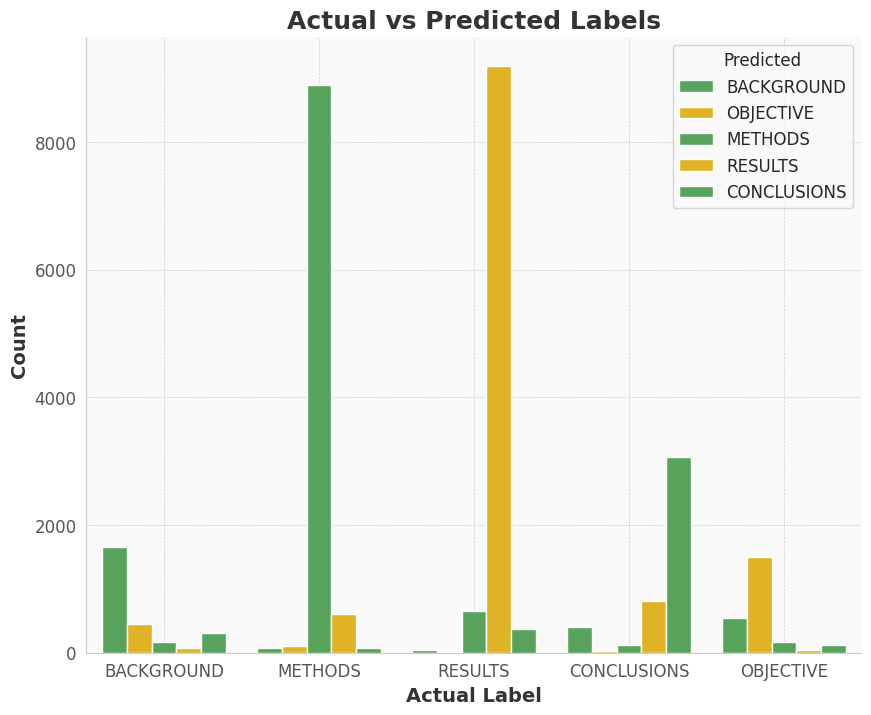

In [43]:
prediction_df = pd.DataFrame({'Actual': test_data['target'], 'Predicted': test_predictions})
plt.figure(figsize=(10, 8))
label_map = {0: 'BACKGROUND', 1: 'CONCLUSIONS', 2: 'METHODS', 3: 'OBJECTIVE', 4: 'RESULTS'}

# Map the encoded labels to their corresponding class names
prediction_df['Actual'] = prediction_df['Actual'].map(label_map)
prediction_df['Predicted'] = prediction_df['Predicted'].map(label_map)
# Set background color
plt.rcParams['axes.facecolor'] = '#f9f9f9'

# Plot the countplot
ax = sns.countplot(data=prediction_df, x='Actual', hue='Predicted', palette=['#4CAF50', '#FFC107'])
plt.title("Actual vs Predicted Labels", fontsize=18, fontweight='bold', color='#333333')
plt.xlabel("Actual Label", fontsize=14, fontweight='bold', color='#333333')
plt.ylabel("Count", fontsize=14, fontweight='bold', color='#333333')

ax.tick_params(axis='x', labelsize=12, labelcolor='#555555')
ax.tick_params(axis='y', labelsize=12, labelcolor='#555555')

plt.legend(title="Predicted", loc="upper right", fontsize=12, title_fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(color='#CCCCCC', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)

plt.show()

In [44]:
prediction_df['abstract_text'] = test_data['abstract_text']
prediction_df.sample(20).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,Actual,Predicted,abstract_text
7949,METHODS,METHODS,patients assessed intervention conditions blindly reassessed via telephone interview 3 months 3 groups assessed 12 months screenedonly 92 assessed 99 intervention 87
26538,CONCLUSIONS,RESULTS,heparin treatment successful onehalf cases presence sessile small thrombi inadequate anticoagulant status
18599,RESULTS,RESULTS,difference remained significant considering subgroups unifocal multifocal ga lesions eyes ort subgroups slower enlargement amount ga eyes without ort 291170 vs 208088 p 001 eyes multifocal ga lesions 224140 vs 163057 p 002 eyes unifocal ga lesions
18939,RESULTS,RESULTS,symptoms improved fewer treatmentemergent adverse events reported creon placebo
6224,METHODS,METHODS,patients low back pain least 10 days sick leave randomly assigned early management occupational physician n 61 reference group management worker supervisor first 3 months sick leave n 59
15164,RESULTS,RESULTS,average baseline age 112 years baseline sphe 210 baseline axial length 246 mm 320 days compliant lens wear estimated increase axial length al 33 less 027 mm 95 ci 0220 32 mm 040 mm 95 ci 0350 45 mm contact lens spectacle lens groups respectively
14973,METHODS,METHODS,mizolastine 10 mg loratadine 10 mg placebo given 90 healthy volunteers 60 allergic patients doubleblind randomized manner
21577,RESULTS,RESULTS,ratios proinsulin insulin higher treatment glibenclamide vs insulintreated patients year 2
16233,OBJECTIVE,BACKGROUND,results studies selective serotonin reuptake inhibitors ssris promising longterm results exist
7427,RESULTS,RESULTS,overcost explained expensive price greater toxicity 12 grade 34 toxicity 9 hospitalizations including one intensive care unit 8 treated patients tomudex despite lower cost administration drug


╒═══════════╤═════════╕
│ Metric    │ Value   │
╞═══════════╪═════════╡
│ Accuracy  │ 82.39%  │
├───────────┼─────────┤
│ Precision │ 82.14%  │
├───────────┼─────────┤
│ Recall    │ 82.39%  │
├───────────┼─────────┤
│ F1 Score  │ 82.18%  │
╘═══════════╧═════════╛


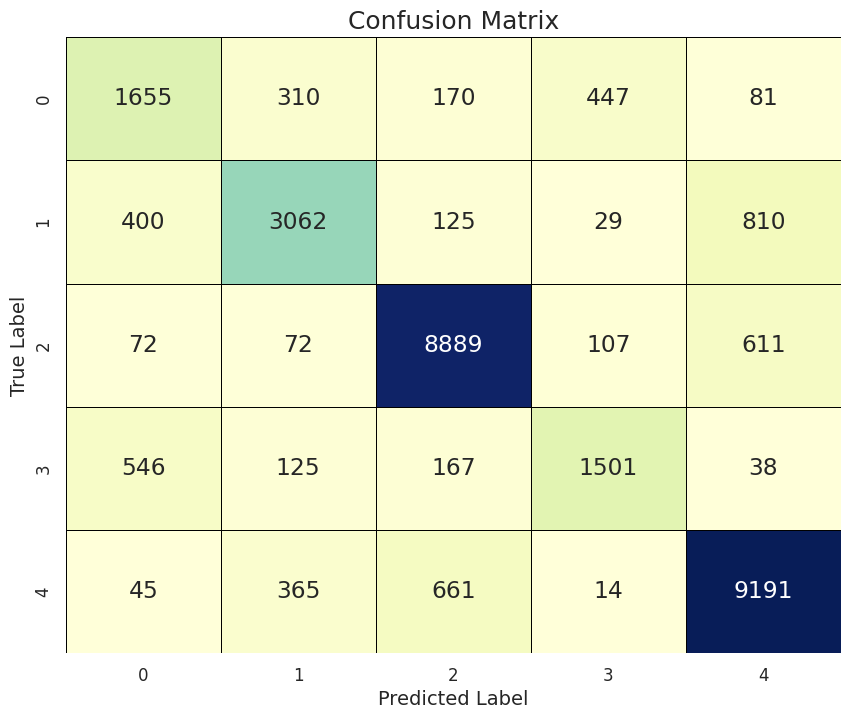

In [45]:
from tabulate import tabulate

evaluation_data = [
    ["Accuracy", f"{test_accuracy*100:.2f}%"],
    ["Precision", f"{test_precision*100:.2f}%"],
    ["Recall", f"{test_recall*100:.2f}%"],
    ["F1 Score", f"{test_f1*100:.2f}%"]
]
print(tabulate(evaluation_data, headers=["Metric", "Value"], tablefmt="fancy_grid"))

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(test_confusion_mat, annot=True, cmap="YlGnBu", fmt="d", cbar=False, linewidths=0.5, linecolor='black')
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

![](https://static.fontget.com/t/h/thank-you/preview@2x.png)